In this notebook we are going to focus on features which will be derived from time domain characteristics.

In [1]:
import numpy as np
import math
from scipy.signal import argrelextrema, find_peaks

In [2]:
path = "/Users/ecem/Desktop/phonocardiogram/data/AV/present"

In [3]:
waves = np.load(path + "/present_AV_waves_10sec.npy", allow_pickle= True)

In [4]:
waves.shape

(1245, 40000)

## Mean:

In [5]:
mean_ = np.zeros(1245)

In [6]:
for i in range(waves.shape[0]):
    mean_[i] = waves[i].mean()

## Standart deviation:

In [7]:
std_ = np.zeros((1245))
for i in range(waves.shape[0]):
    std_[i] = waves[i].std()

## Skewness

In [8]:
from scipy.stats import skew

In [9]:
skew_ = np.zeros((1245))
for i in range(waves.shape[0]):
    skew_[i] = skew(waves[i])

## Kurtosis

In [10]:
import scipy.stats

In [11]:
kurt_ = np.zeros((1245))
for i in range(waves.shape[0]):
    kurt_[i] =  scipy.stats.kurtosis(waves[i])

## Harmonic Mean

In [12]:
harmonic_ = np.zeros((1245))
for i in range(waves.shape[0]):
    harmonic_[i] =  scipy.stats.hmean(waves[i]* waves[i])

## Autocorrelation

In [13]:
from scipy import signal
from scipy.signal import find_peaks

In [14]:
autocorr = signal.fftconvolve(waves[0], waves[0], mode='full')

/var/folders/gd/3d6ckpdn4q30skhxnvs_p7b80000gn/T/ipykernel_40505/835141848.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


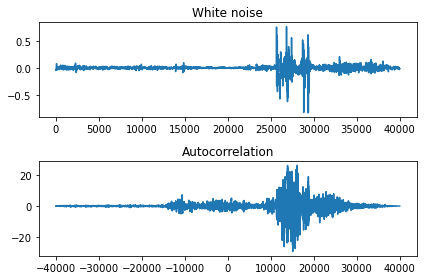

In [15]:
import matplotlib.pyplot as plt
>>> fig, (ax_orig, ax_mag) = plt.subplots(2, 1)
>>> ax_orig.plot(waves[0])
>>> ax_orig.set_title('White noise')
>>> ax_mag.plot(np.arange(-len(waves[0])+1,len(waves[0])), autocorr)
>>> ax_mag.set_title('Autocorrelation')
>>> fig.tight_layout()
>>> fig.show()

In [16]:
peaks = find_peaks(autocorr, height = 10)

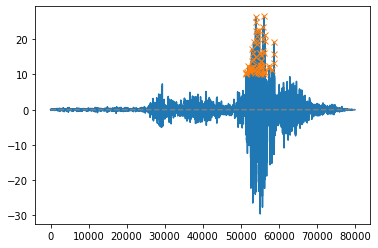

In [17]:
>>> plt.plot(autocorr)
>>> plt.plot(peaks[0], autocorr[peaks[0]], "x")
>>> plt.plot(np.zeros_like(autocorr), "--", color="gray")
>>> plt.show()

In [18]:
autocorr = signal.fftconvolve(waves[79], waves[79], mode='full')

/var/folders/gd/3d6ckpdn4q30skhxnvs_p7b80000gn/T/ipykernel_40505/759871826.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


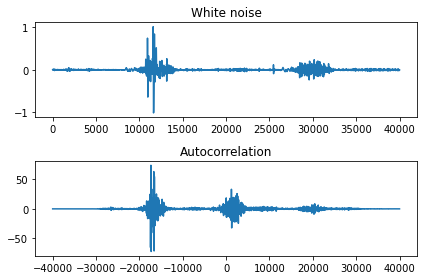

In [19]:
>>> fig, (ax_orig, ax_mag) = plt.subplots(2, 1)
>>> ax_orig.plot(waves[79])
>>> ax_orig.set_title('White noise')
>>> ax_mag.plot(np.arange(-len(waves[79])+1,len(waves[79])), autocorr)
>>> ax_mag.set_title('Autocorrelation')
>>> fig.tight_layout()
>>> fig.show()

peaks = find_peaks(autocorr, height = 10)



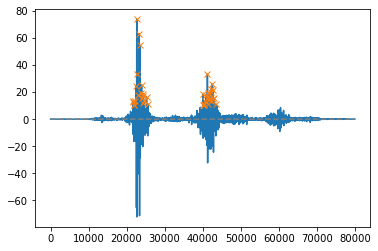

In [20]:
>>> plt.plot(autocorr)
>>> plt.plot(peaks[0], autocorr[peaks[0]], "x")
>>> plt.plot(np.zeros_like(autocorr), "--", color="gray")
>>> plt.show()

In [21]:
peaks[0].mean()

32706.341463414636

In [22]:
auto_corr = np.zeros((1245, 79999))
peaks_ = []
for i in range(waves.shape[0]):
    auto_corr[i,:] = signal.fftconvolve(waves[i], waves[i], mode='full')
    peaks_.append(find_peaks(auto_corr[i], height = 0)[1]["peak_heights"].mean())
    

In [23]:
peaks_ = np.array(peaks_)
peaks_.shape

(1245,)

# Now lets create their dataframes

In [24]:
import pandas as pd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [25]:
mean_df = pd.DataFrame(mean_, columns =["mean"])
mean_df.head()

mean
0 -0.000040
1 -0.000483
2 -0.000067
3 -0.000062
4  0.000141

In [26]:
std_df = pd.DataFrame(std_, columns =["std"])
std_df.head()

std
0  0.060224
1  0.027385
2  0.019704
3  0.022971
4  0.026843

In [27]:
kurtosis_df = pd.DataFrame(kurt_, columns = ["kurtosis"])
kurtosis_df.head()

kurtosis
0  51.817342
1   2.901926
2   4.582113
3   3.136028
4   4.079496

In [28]:
skew_df = pd.DataFrame(skew_, columns =["skewness"])
skew_df.head()

skewness
0 -0.638895
1  0.169739
2  0.181507
3 -0.092871
4  0.031420

In [29]:
harmonic_df = pd.DataFrame(harmonic_, columns =["harmonic mean"])
harmonic_df.head()

harmonic mean
0   4.405790e-10
1   1.058298e-08
2   2.210099e-09
3   4.928371e-09
4   1.251589e-11

In [32]:
autocorr_peaks_df = pd.DataFrame(peaks_, columns =["ac peak height mean"])
autocorr_peaks_df.head()

ac peak height mean
0             2.167401
1             0.825860
2             0.303073
3             0.467023
4             0.599395

## Now concatenate all features

In [33]:
df = pd.concat([mean_df, std_df, skew_df, kurtosis_df, harmonic_df, autocorr_peaks_df], axis =1)

In [34]:
df

mean       std  skewness   kurtosis  harmonic mean  \
0    -0.000040  0.060224 -0.638895  51.817342   4.405790e-10   
1    -0.000483  0.027385  0.169739   2.901926   1.058298e-08   
2    -0.000067  0.019704  0.181507   4.582113   2.210099e-09   
3    -0.000062  0.022971 -0.092871   3.136028   4.928371e-09   
4     0.000141  0.026843  0.031420   4.079496   1.251589e-11   
...        ...       ...       ...        ...            ...   
1240 -0.000112  0.069700 -0.569312   4.866047   2.078173e-08   
1241  0.000324  0.089558 -0.047007   7.927406   1.564200e-08   
1242  0.000426  0.089493 -0.188578   2.549026   4.151414e-08   
1243 -0.000156  0.100999  0.054567   4.374774   1.060101e-12   
1244 -0.001071  0.164105 -0.129876   6.742510   2.881127e-07   

      ac peak height mean  
0                2.167401  
1                0.825860  
2                0.303073  
3                0.467023  
4                0.599395  
...                   ...  
1240             7.022980  
1241             8.178963  
1242            13.439792  
1243            15.628110  
1244            43.147708  

[1245 rows x 6 columns]

In [35]:
df.to_csv("/Users/ecem/Desktop/phonocardiogram/data/AV/present/AV-statistical-features.csv" )